<a href="https://colab.research.google.com/github/ai7dnn/2021-AI-for-everyone/blob/main/code/3_2_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교재보다 간결하게 선형회귀 구현과 평가

In [1]:
# 일차원 데이터를 바로 입력하는 간편한 방법
import numpy as np

x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [ -2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

x = np.array(x).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

# 모델이 구한 기울기
print(lr.coef_)
print(lr.coef_[0])

# 모델이 구한 절편
print(lr.intercept_)

[1.]
0.9999999999999999
0.9999999999999999


In [2]:
# 테스트 데이터를 생성해 예측
x_test = [-4, 15, -1, 5,  8]
x_test = np.array(x_test).reshape(-1, 1)

y_pred = lr.predict(x_test)
y_pred

array([-3., 16.,  0.,  6.,  9.])

## 일차함수 관계식 찾기

x 변수, y 변수 데이터 만들기 (리스트 객체)

In [3]:
x = [-3,  31,  -11,  4,  0,  22, -2, -5, -25, -14]
y = [ -2,   32,   -10,   5,  1,   23,  -1,  -4, -24,  -13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


그래프 그리기 (matplotlib)

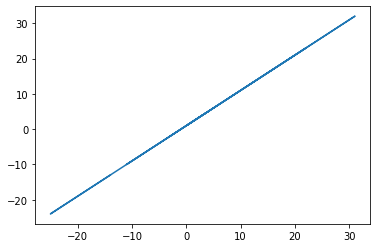

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

- 판다스 데이터프레임 만들기

In [5]:
import pandas as pd
df = pd.DataFrame({'X':x, 'Y':y})
df.shape

(10, 2)

In [6]:
df

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [7]:
df.head()

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [8]:
df.tail()

,X,Y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


머신러닝 - 사이킷런 *LinearRegression* 모형

In [9]:
df

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [10]:
train_features = ['X']
target_cols = ['Y']
X_train = df.loc[:, train_features]
y_train = df.loc[:, target_cols]
print(X_train.shape, y_train.shape)

(10, 1) (10, 1)


In [11]:
# DataFrame
X_train

,X
0,-3
1,31
2,-11
3,4
4,0
5,22
6,-2
7,-5
8,-25
9,-14


In [12]:
type(X_train)

pandas.core.frame.DataFrame

In [13]:
y_train

,Y
0,-2
1,32
2,-10
3,5
4,1
5,23
6,-1
7,-4
8,-24
9,-13


In [14]:
x

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([[1.]])

In [17]:
lr.intercept_

array([1.])

In [18]:
print ("기울기: ", lr.coef_[0][0])
print ("y절편: ", lr.intercept_[0])

기울기:  0.9999999999999999
y절편:  0.9999999999999999


In [19]:
import numpy as np
X_test = np.array(11).reshape(-1, 1)
X_test

array([[11]])

In [20]:
lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[12.]])

In [21]:
X_test = np.arange(11, 16).reshape(-1, 1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [22]:
lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

#### 위 경고를 없애려면 학습의 형태와 동일한 데이터프레임으로 입력

In [23]:
import pandas as pd
X_test = pd.DataFrame(np.arange(11, 16), columns=['X'])
X_test

,X
0,11
1,12
2,13
3,14
4,15


In [24]:
lr.predict(X_test)

array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

In [25]:
m = np.array(np.arange(24))

In [26]:
m.reshape(-1, 12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

### 선형회귀로 논리 연산자 OR 구하기

In [27]:
# 일차원 데이터를 바로 입력하는 간편한 방법
import numpy as np

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [ 0, 1, 1, 1]

#x = np.array(x).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

# 모델이 구한 기울기
print(lr.coef_)
print(lr.coef_[0])

# 모델이 구한 절편
print(lr.intercept_)

[0.5 0.5]
0.5
0.25000000000000006


In [28]:
# 테스트 데이터를 생성해 예측
x_test = [[1, 1], [0, 1], [1, 0], [0, 0]]

y_pred = lr.predict(x_test)
y_pred

array([1.25, 0.75, 0.75, 0.25])